# Analysis of feedback responses using Pandas
The way I have done this seems rather long winded and clunky. Perhaps it can be more MATLAB-like using numpy.

## Course rating by faculty

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
# Load data
colHeaders = ['timeStamp','fullName','email','faculty','promo','languages','vcs','softEng','course','rating']
colsToLoad = list(range(0,9))
colsToLoad.append(13)
data = pd.read_csv('../feedback.tsv', delimiter = '\t', usecols = colsToLoad, names = colHeaders, skiprows = 1)

In [92]:
# Create categorical columns and rename categories
data.faculty = pd.Categorical(data.faculty)
data.faculty = data.faculty.cat.rename_categories(['BMH','Hum','PSS','EPS'])
data.rating = pd.Categorical(data.rating)
data.rating = data.rating.cat.rename_categories([2,3,4,5])

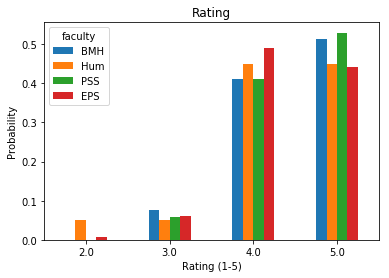

In [93]:
# Plot rating by faculty
# unstack() gives grouped, coloured bars.
# sort_index() sets the order of the x-axis categories
# .T gives transpose matrix, so the plot is grouped by rating
ax = data.groupby('faculty').rating.value_counts(normalize = True).unstack().T.sort_index().plot(kind = 'bar', rot = 0, title = 'Rating')
ax.set_xlabel('Rating (1-5)')
ax.set_ylabel('Probability')
plt.show()

## Version control usage by faculty

In [94]:
# Split mutliple answers into separate rows
import re
import itertools
vcs = data.copy()
# Empty data frame to populate with split answers and merge at the end
splitDF = pd.DataFrame(data=None, columns=vcs.columns)
dropRows = []

for i, row in enumerate(vcs.vcs):
    splitRow = re.split('\s*,\s*',row)
    nAnswers = len(splitRow)
    originalRow = list(vcs.iloc[i])
        
    if nAnswers > 1:
        # Append split up responses to data frame.
        for answer in splitRow:
            dropRows.append(i)
            currentRow = len(splitDF)
            
            # Append original row to dataframe
            splitDF.loc[currentRow] = originalRow
            
            # Replace vcs in current row with each answer in turn
            splitDF = splitDF.set_value(currentRow,'vcs', answer)
                    
# Delete original rows
vcs.drop(vcs.index[dropRows], inplace=True)
              
# Join data frames
#new = pd.concat([vcs, splitDF], axis=0, ignore_index=True)
new = pd.merge(vcs, splitDF, how='outer')

assert(new.shape[0] ==vcs.shape[0] + splitDF.shape[0])

## To do:
    - Test that all the right lines have been dropped (check against MATLAB code)
    - Set 'vcs' column as categorical

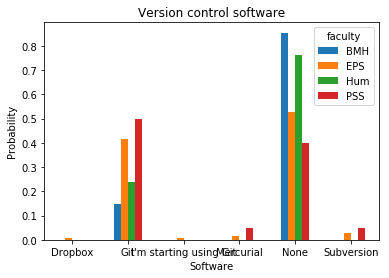

In [95]:
# Plot VCS by faculty
ax = new.groupby('faculty').vcs.value_counts(normalize = True).unstack().T.sort_index().plot(kind = 'bar', rot = 0, title = 'Version control software')
ax.set_xlabel('Software')
ax.set_ylabel('Probability')
plt.show()

In [96]:
data.shape

(250, 10)